## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 2. Load the Data 🖼️

In [2]:
zomato = pd.read_csv("/kaggle/input/sm-zomato-dataset/zomato.csv")

print(zomato.shape)
zomato.head()

(51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## 3.Remove Unnecessary Columns:

In [3]:
# Drop columns that are not required for analysis
#zomato.drop(['url', 'address', 'phone', 'menu_item', 'reviews_list','dish_liked'], axis=1, inplace=True)
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## 4.Rename Columns for Consistency:

In [4]:
# Rename columns for easier access
zomato.rename(columns={'approx_cost(for two people)': 'cost',
                          'listed_in(type)': 'type',
                          'listed_in(city)': 'city'}, inplace=True)

## 5. Handle Missing Values:

In [5]:
# checking for null values
zomato.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7775
votes               0
phone            1208
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost              346
reviews_list        0
menu_item           0
type                0
city                0
dtype: int64

In [6]:
# Checking some values
zomato['rate'].sample(10)

28513    3.9 /5
51387    3.7 /5
40856       NaN
1033      3.7/5
18997     3.8/5
29054    3.4 /5
42471    4.0 /5
15278     3.0/5
46231    4.0 /5
5521      4.2/5
Name: rate, dtype: object

In [7]:
# Replace 'NEW' and '-' with NaN
zomato['rate'] = zomato['rate'].replace({'NEW': np.nan, '-': np.nan})

# Drop rows with NaN values
zomato.dropna(how='any', inplace=True)

In [8]:
# checking shape
zomato.shape

(23046, 17)

## 6. Convert Data Types:

In [9]:
# checking some values of 'cost'
zomato['cost'].sample(10)

49462      150
21871      400
47514      800
48222    1,000
11787    1,700
3352       100
7080       550
12844      900
1476       550
17503    1,500
Name: cost, dtype: object

In [10]:
# Remove '/5' from ratings and convert to float
zomato['rate'] = zomato['rate'].apply(lambda x: str(x).split('/')[0])
zomato['rate'] = zomato['rate'].astype(float)

# Remove commas from cost and convert to float
zomato['cost'] = zomato['cost'].apply(lambda x: str(x).replace(',', ''))
zomato['cost'] = zomato['cost'].astype(float)


In [11]:
# now everything is fine
zomato['cost'].sample(5)

38185     300.0
19154     450.0
5379     1000.0
41608     500.0
15602     750.0
Name: cost, dtype: float64

## 7. Remove Duplicates

In [12]:
zomato.drop_duplicates(inplace=True)

In [13]:
zomato.duplicated().sum()

0

## 8.Exploratory Data Analysis (EDA):

# 1. Distribution of Ratings:¶

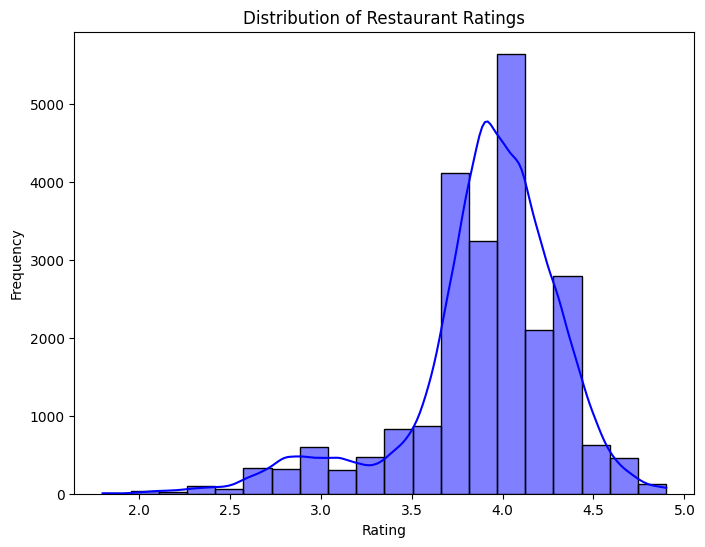

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(zomato['rate'], bins=20, kde=True , color='blue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### The majority of restaurants have ratings between 3.0 and 4.5, indicating a generally favorable dining experience. ✅

## 2.Online Orders vs. Ratings:

In [15]:
# Calculate average rating for online_order = Yes/No
avg_rating = zomato.groupby('online_order')['rate'].mean().reset_index()

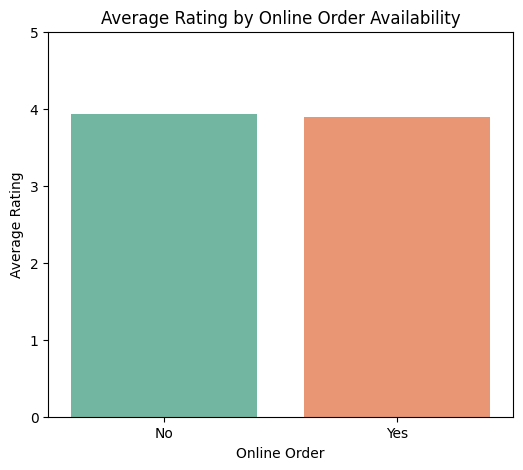

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average rating for online_order = Yes/No
avg_rating = zomato.groupby('online_order')['rate'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(6, 5))
sns.barplot(x='online_order', y='rate', data=avg_rating, palette='Set2')
plt.title('Average Rating by Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.show()


### Restaurants that offer online ordering tend to have higher ratings, suggesting better customer satisfaction and convenience.✅

## 3. Table Booking vs. Ratings:

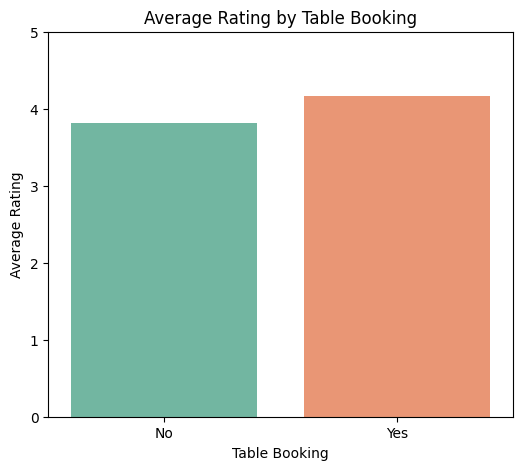

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average rating grouped by 'book_table'
avg_rating = zomato.groupby('book_table')['rate'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x='book_table', y='rate', data=avg_rating, palette='Set2')
plt.title('Average Rating by Table Booking')
plt.xlabel('Table Booking')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # ratings are out of 5
plt.show()

### Restaurants that offer table booking facilities tend to have higher ratings, indicating a preference for planned dining experiences.✅

## 4. Restaurant Types Distribution:

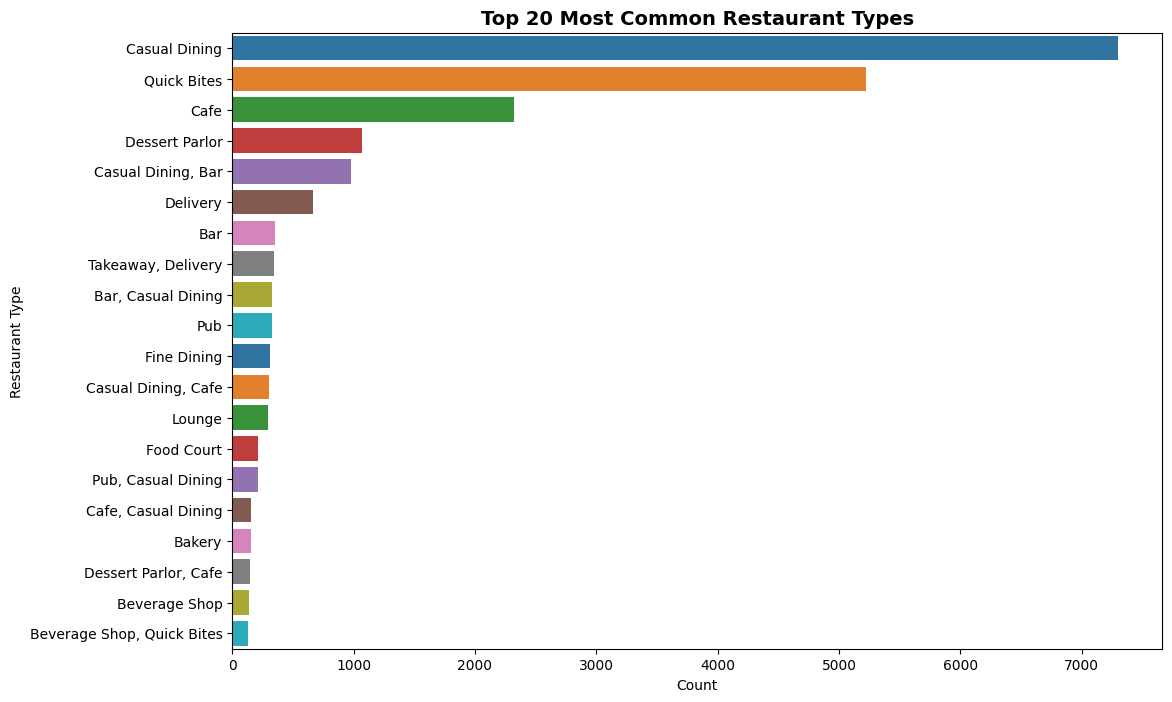

In [18]:
# Get top 20 most common restaurant types
top25 = zomato['rest_type'].value_counts().nlargest(20).index

# Filter dataset for only these top 25
df_top = zomato[zomato['rest_type'].isin(top25)]

plt.figure(figsize=(12, 8))  
sns.countplot(
    y='rest_type', 
    data=df_top, 
    order=top25, 
    palette='tab10'
)

plt.title('Top 20 Most Common Restaurant Types', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')

plt.yticks(fontsize=10) 
plt.show()

### Quick Bites and Casual Dining restaurants are the most common types, dominating Bangalore's food scene.✅

## 5. Distribution of Ratings Across Locations

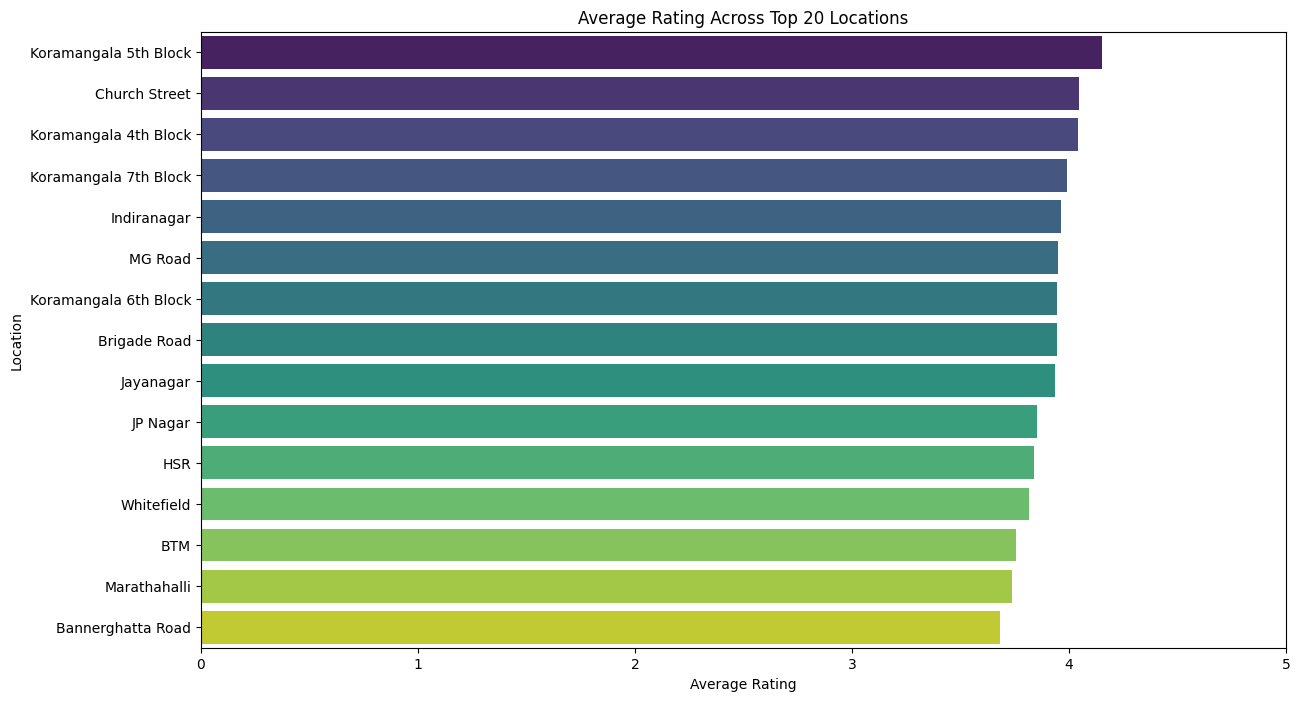

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter top 15 locations
top_locations = zomato['location'].value_counts().nlargest(15).index
filtered_data = zomato[zomato['location'].isin(top_locations)]

# Calculate average rating
avg_rating = filtered_data.groupby('location')['rate'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='viridis')
plt.title('Average Rating Across Top 20 Locations')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.xlim(0, 5)
plt.show()

### Koramangala 5th Block is home to the highest-rated restaurants in Bangalore.✅

## 6. Donut Chart of Online Order Availability

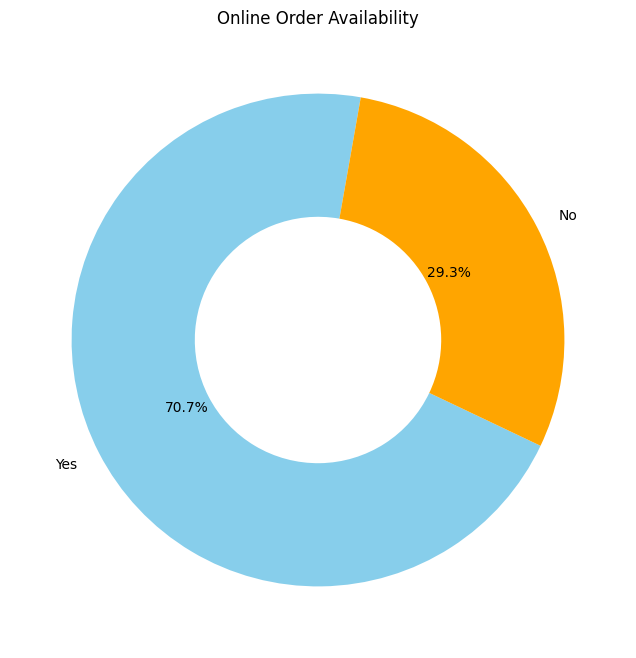

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
colors = ['skyblue', 'orange']
values = zomato['online_order'].value_counts()
labels = values.index

# Donut chart
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=80, wedgeprops={'width': 0.5})
plt.title('Online Order Availability')
plt.ylabel('')
plt.show()

### Only 65.7% of restaurants offer online ordering, leaving a significant portion without this convenience.✅

## 7. Countplot of locations with most restaurants

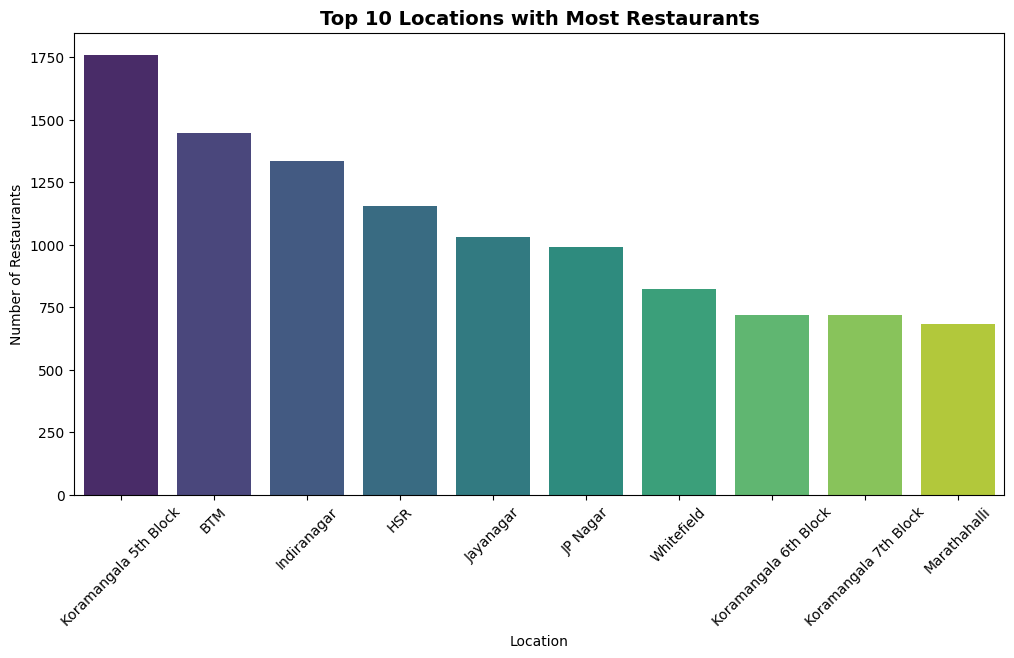

In [21]:
# Get the top 10 locations with the most restaurants
top10 = zomato['location'].value_counts().nlargest(10).index

# Filter dataset for only these locations
df_top = zomato[zomato['location'].isin(top10)]

plt.figure(figsize=(12, 6))
sns.countplot(x='location', data=df_top, order=top10, palette='viridis')
plt.title('Top 10 Locations with Most Restaurants', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Number of Restaurants")
plt.show()

## 8. Word Cloud for Most Popular Cuisines

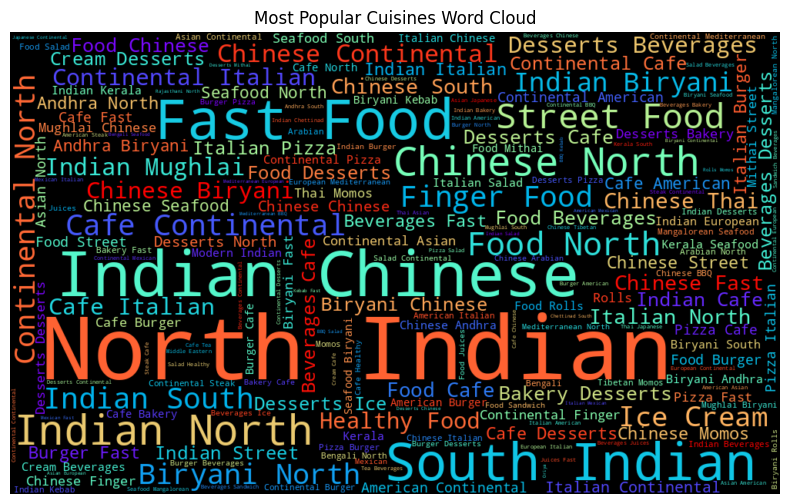

In [22]:
#%pip install wordcloud

from wordcloud import WordCloud

text = ' '.join(zomato['cuisines'].dropna().values)
wordcloud = WordCloud(width=1000, height=600, background_color='black', colormap='rainbow').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Cuisines Word Cloud')
plt.show()